# Data Mining Week 10 Class Practice
# Rayna Shera Chang / 0706022310022

## Import Library

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Load Dataset

In [129]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


## Data Understanding

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


The dataset contains **500 rows and 12 columns**, with **no missing values** across all features. Most columns are already in **numeric format** (floats and integers), making them ready for scaling or modeling, except **Education**, which is the only **categorical column** stored as an object type and therefore requires encoding before use in machine learning. Overall, the dataset is clean, complete, and consists mainly of numerical features suitable for further preprocessing and modeling.


In [131]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


The dataset’s numerical summary shows that all 500 observations are complete and exhibit healthy variation across customer attributes. Income, balance, and credit card limit have wide ranges, suggesting diverse financial profiles within the customer base. Credit scores average around 565 with a substantial spread, indicating mixed credit quality. Customers have been with the bank for about 11 years on average, with transaction counts varying significantly (1 to 99), which implies differing levels of engagement. Purchase frequency and online activity display low means and high variability, showing that while some customers are highly active digitally, many remain low-frequency users. Customer satisfaction averages around 2.56 out of 4, indicating generally moderate satisfaction with room for improvement. Overall, the descriptive statistics suggest a diverse customer population, making the dataset well-suited for segmentation, churn analysis, or targeted financial product recommendations.

## Data Preparation

In [132]:
# Check for missing values in dataset
df.isnull().sum()

,0
Income,0
Age,0
Education,0
Credit_Score,0
Years_with_Bank,0
Transaction_Count,0
Balance,0
Loan_Approval_Amount,0
Credit_Card_Limit,0
Purchase_Frequency,0


In [133]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity


In [134]:
# show unique values from column
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

In [135]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
import pandas as pd

# 1. Ordinal Encoding
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df['Education'] = df['Education'].map(education_mapping)

df.sample(n=5)

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
228,96052.79429,56,1,334,12,54,3553.426162,27917.26785,16226.69598,0.470523,1,0.303267
313,31720.22757,57,1,774,17,50,4727.631128,45937.50701,1254.01359,0.206012,4,0.623150
234,40560.25566,22,1,562,17,52,9376.863574,34002.72270,19547.82626,0.792154,1,0.279004
224,38922.69582,19,1,519,7,28,1077.788141,23002.52925,3149.34404,0.046752,1,0.795013
189,48395.87466,55,0,619,11,37,7863.189772,34808.72976,10551.02621,0.608208,2,0.972653


## Exploratory Data Analysis

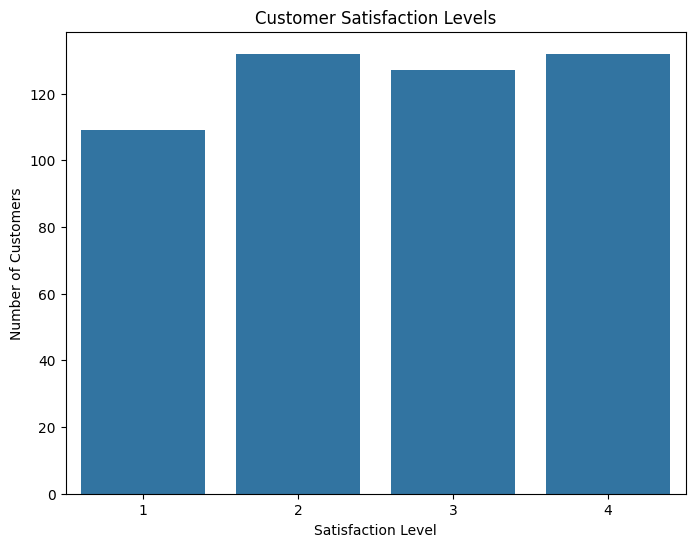

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Satisfaction', data=df)
plt.title('Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.show()

The bar chart shows that customer satisfaction levels are fairly evenly distributed, with slightly more customers reporting satisfaction levels of 2 and 4 compared to levels 1 and 3. This indicates that while the customer base includes a mix of experiences, most customers tend to fall in the moderate to high satisfaction range rather than being extremely dissatisfied. The relatively balanced distribution suggests no severe dissatisfaction issues but highlights an opportunity for the bank to shift more customers from mid-level satisfaction (level 2) toward higher satisfaction (level 4) by improving service quality or customer engagement strategies.


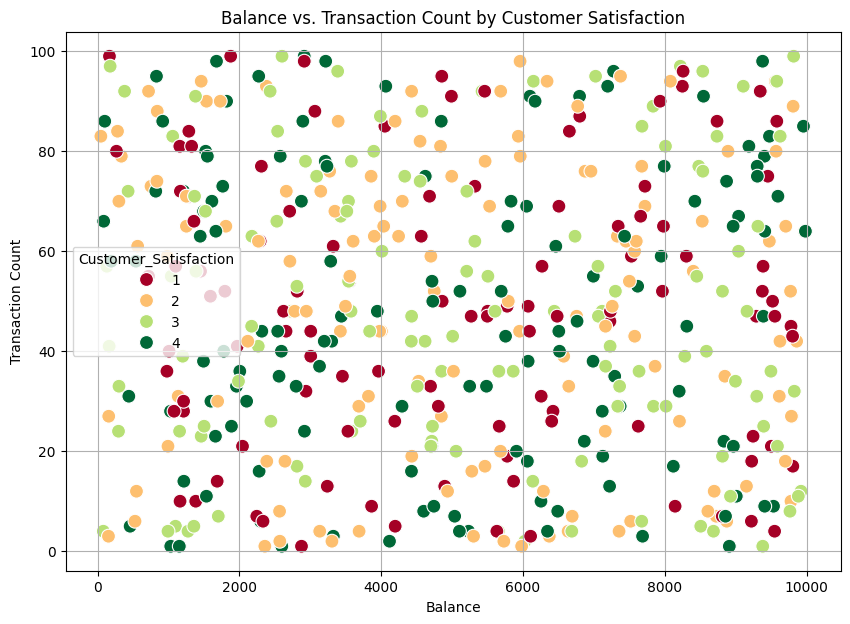

In [137]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Transaction_Count', data=df, hue='Customer_Satisfaction', palette='RdYlGn', s=100)
plt.title('Balance vs. Transaction Count by Customer Satisfaction')
plt.xlabel('Balance')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()

This scatter plot shows that customers are widely distributed across different balance levels and transaction counts, with no strong linear relationship between the two variables. Customers with both high and low satisfaction levels appear throughout the entire plot, indicating that satisfaction does not clearly depend on either balance or transaction activity alone. Although some higher-satisfaction customers (level 4) appear slightly more often in the mid-to-upper ranges of both balance and transaction count, the overall pattern suggests that customer satisfaction is influenced by factors beyond just financial balance and transaction frequency.

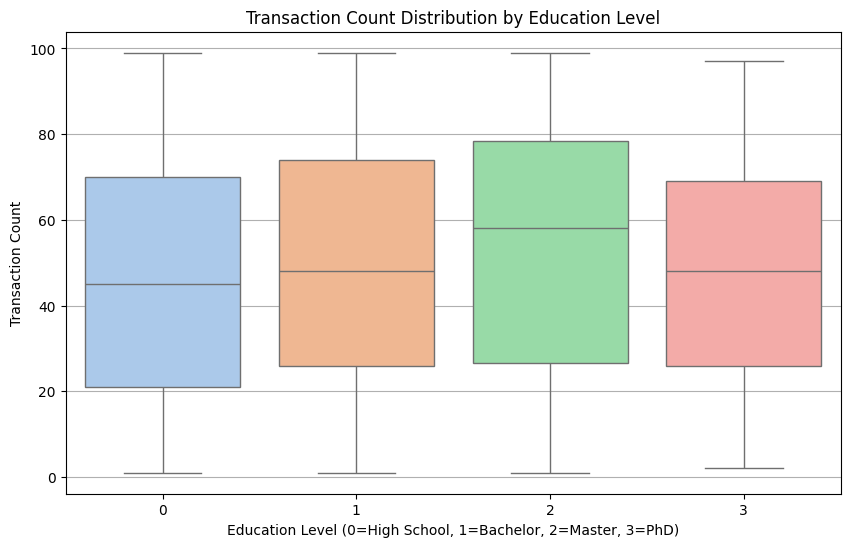

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Transaction_Count', data=df, hue='Education', palette='pastel', legend=False)
plt.title('Transaction Count Distribution by Education Level')
plt.xlabel('Education Level (0=High School, 1=Bachelor, 2=Master, 3=PhD)')
plt.ylabel('Transaction Count')
plt.grid(axis='y')
plt.show()

This boxplot shows that transaction activity varies widely across all education levels, with all groups exhibiting similarly broad ranges from very low to very high transaction counts. While customers with Master’s degrees (level 2) show a slightly higher median transaction count, the differences between education levels are relatively small overall. This suggests that education level does not strongly influence how frequently customers engage in banking transactions, indicating that transaction behavior is driven more by personal financial needs or habits rather than educational background.


## Hierarchical Clustering Modeling (Without Scaling)

### Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


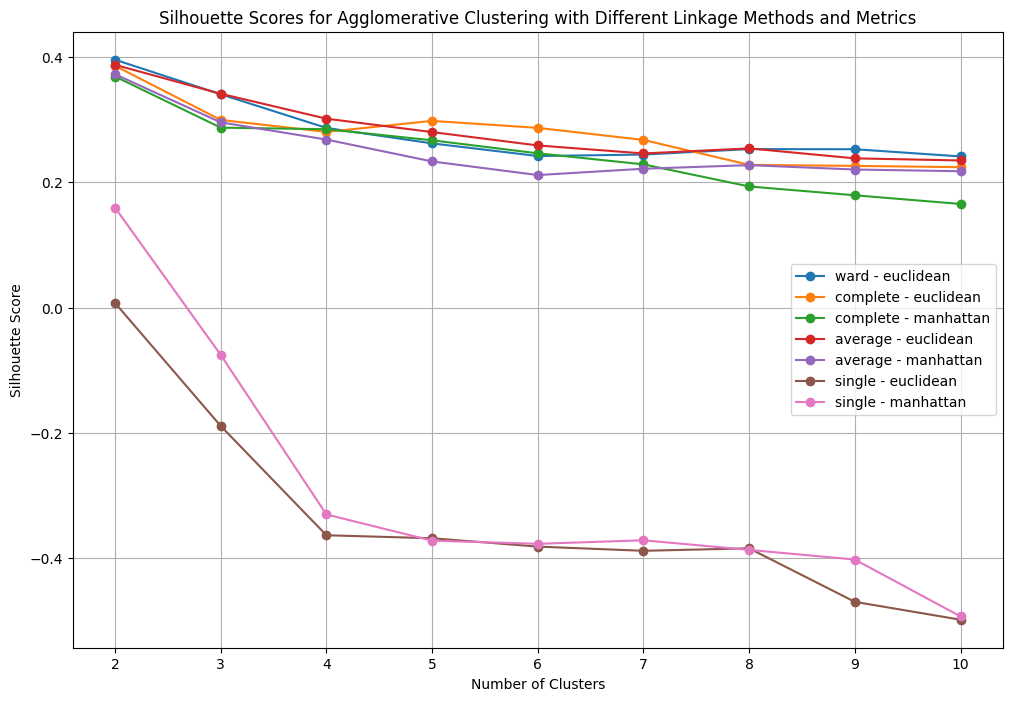

Best Silhouette Score: 0.39572706946177905
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [139]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df)
            silhouette_avg = silhouette_score(df, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

The silhouette score comparison clearly shows that the best clustering performance occurs when using **Ward linkage with Euclidean distance at k = 2**, which achieves the highest score of approximately **0.396**. Across all methods, silhouette scores consistently decline as the number of clusters increases, indicating weaker separation and cohesion when forcing more clusters. Ward–Euclidean and Complete–Euclidean consistently outperform other linkage–metric combinations, while Single linkage (both Euclidean and Manhattan) performs poorly with negative silhouette scores for k ≥ 3, suggesting that it forms elongated, poorly separated clusters. Overall, the results indicate that the dataset naturally forms **two well-defined groups**, and Ward–Euclidean is the most effective method for capturing this structure.

In [140]:
# Hierarchical Clustering (Data Without Scalling)
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df)

In [141]:
# Evaluation
ss = silhouette_score(df, y_hc)
print(ss)

0.39572706946177905


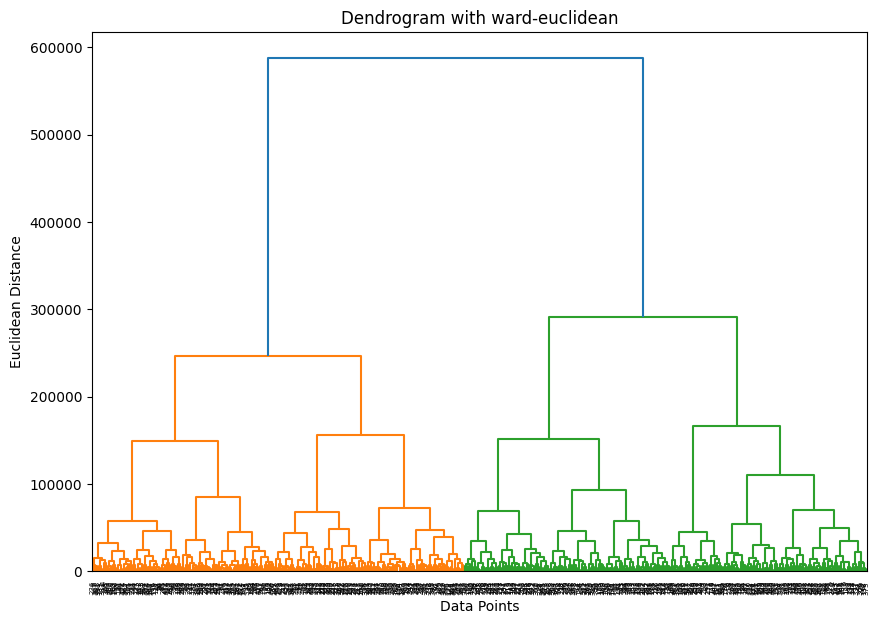

In [142]:
# Best Combination Parameter
# Average Distance
linked = linkage(df, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Modeling (With Scaling)

### Comparing Silhouette Score to get best combination of linkage and metric

In [143]:
# Scale dataset with standard scaler
# Numerical Columns
num_cols = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'
]

# Categorical Columns
cat_cols = ['Education', 'Customer_Satisfaction']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_scaled = pd.concat([df_scaled_num, df[cat_cols].reset_index(drop=True)], axis=1)
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,1,4


In [144]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000
mean,2.158274e-16,1.421085e-16,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-8.171241e-17,1.404000,2.564000
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.132851,1.101058
min,-1.687691e+00,-1.688120e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.676552e+00,0.000000,1.000000
25%,-8.535233e-01,-8.444436e-01,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-8.654451e-01,0.000000,2.000000
50%,-3.347132e-02,-7.746485e-02,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,-3.124291e-02,1.000000,3.000000
75%,8.033504e-01,8.429096e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,8.997453e-01,2.000000,4.000000
max,1.723192e+00,1.839982e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.717971e+00,3.000000,4.000000


Skipping Ward linkage with Manhattan metric (not supported).


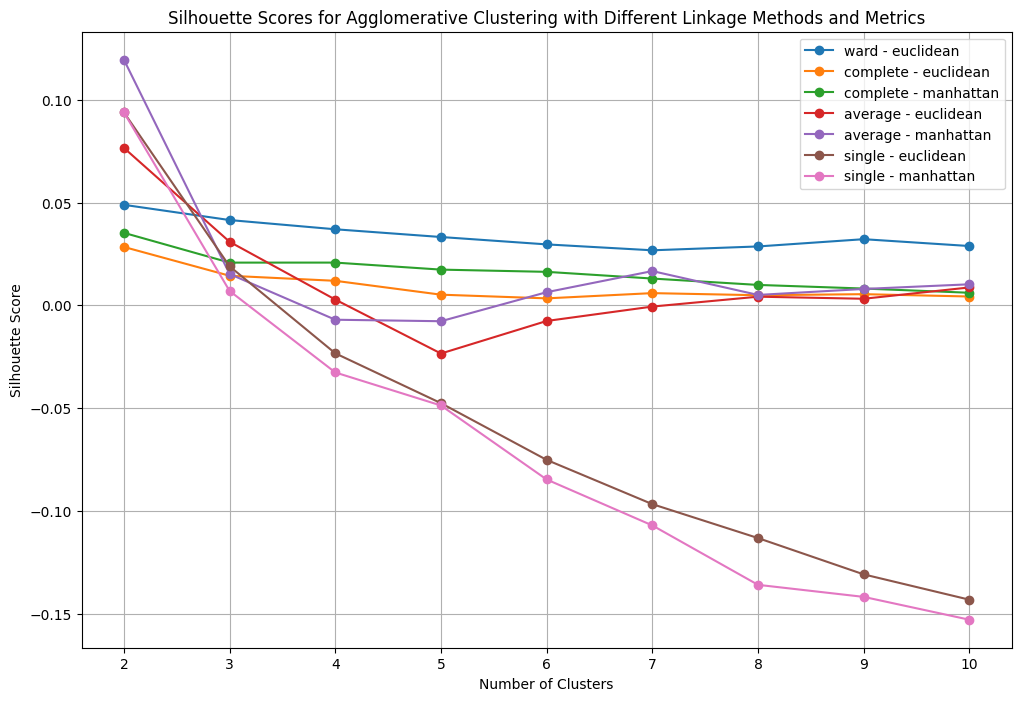

Best Silhouette Score: 0.11941665128362669
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [145]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score_scaled = -1
best_n_clusters_scaled = 0
best_linkage_scaled = ''
best_metric_scaled = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score_scaled:
                best_silhouette_score_scaled = silhouette_avg
                best_n_clusters_scaled = n_clusters
                best_linkage_scaled = linkage_method
                best_metric_scaled = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score_scaled}")
print(f"Optimal Number of Clusters: {best_n_clusters_scaled}")
print(f"Optimal Linkage Method: {best_linkage_scaled}")
print(f"Optimal Metric: {best_metric_scaled}")

In [146]:
# Hierarchical Clustering Model (Data With Scalling)
aggloScaled = AgglomerativeClustering(n_clusters=best_n_clusters_scaled, linkage=best_linkage_scaled, metric=best_metric_scaled)
y_hc_scaled = aggloScaled.fit_predict(df_scaled)

In [147]:
# Evaluation
ss_ward = silhouette_score(df_scaled, y_hc_scaled)
print(ss_ward)

0.11941665128362669


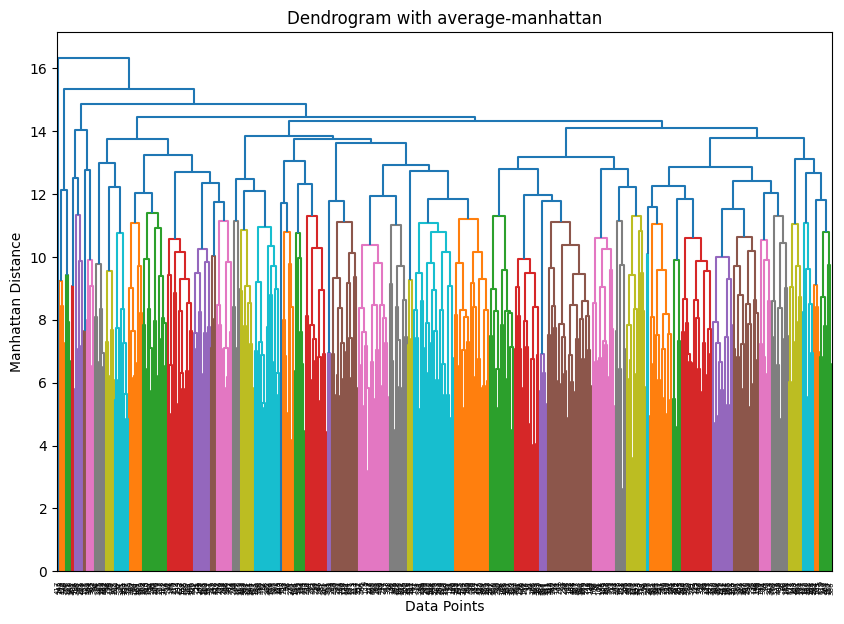

In [148]:
# Best Combination Parameter
fixed_metric = "cityblock" if best_metric_scaled == "manhattan" else best_metric_scaled

linked = linkage(df_scaled, method=best_linkage_scaled, metric=fixed_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage_scaled + "-" + best_metric_scaled)
plt.xlabel("Data Points")
plt.ylabel("Manhattan Distance")
plt.show()

## Merge With Original Data

In [149]:
# Add the cluster labels to the original data
df['Unscaled_Cluster'] = y_hc
df['Scaled_Cluster'] = y_hc_scaled

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Unscaled_Cluster,Scaled_Cluster
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,0
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,0
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,0


## Compare Visualization

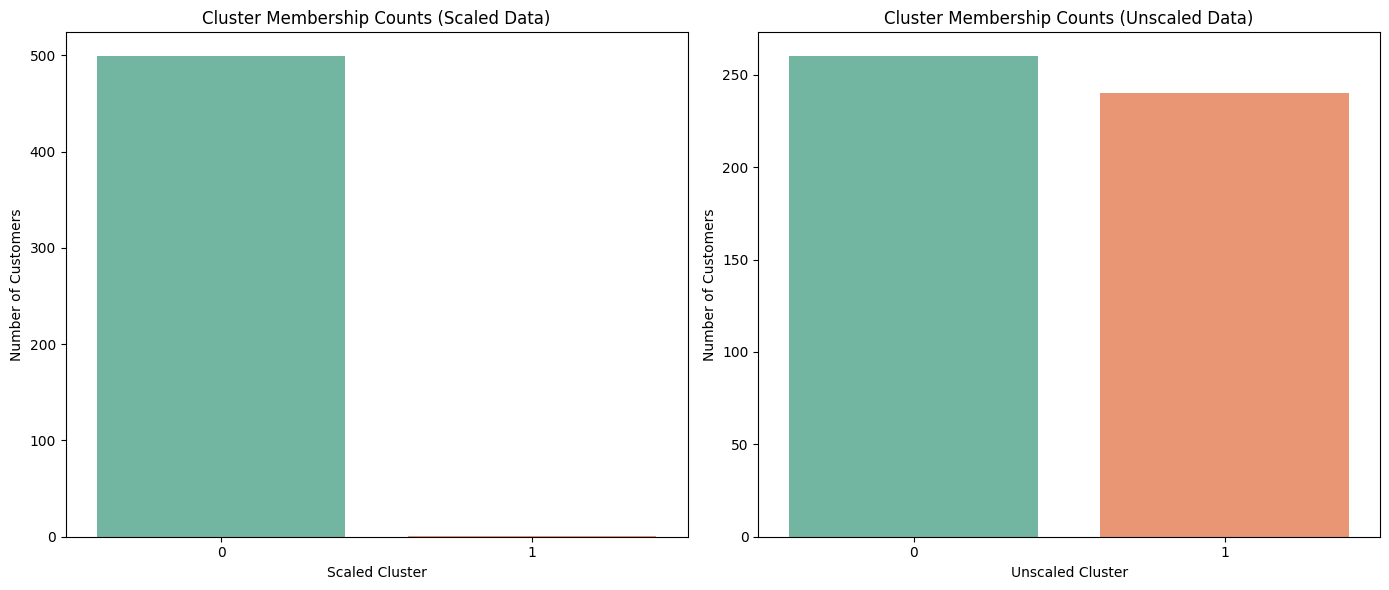

In [150]:
plt.figure(figsize=(14, 6))

# Scaled Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='Scaled_Cluster',
    hue='Scaled_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Scaled Data)')
plt.xlabel('Scaled Cluster')
plt.ylabel('Number of Customers')

# Unscaled Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Unscaled_Cluster',
    hue='Unscaled_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Unscaled Data)')
plt.xlabel('Unscaled Cluster')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

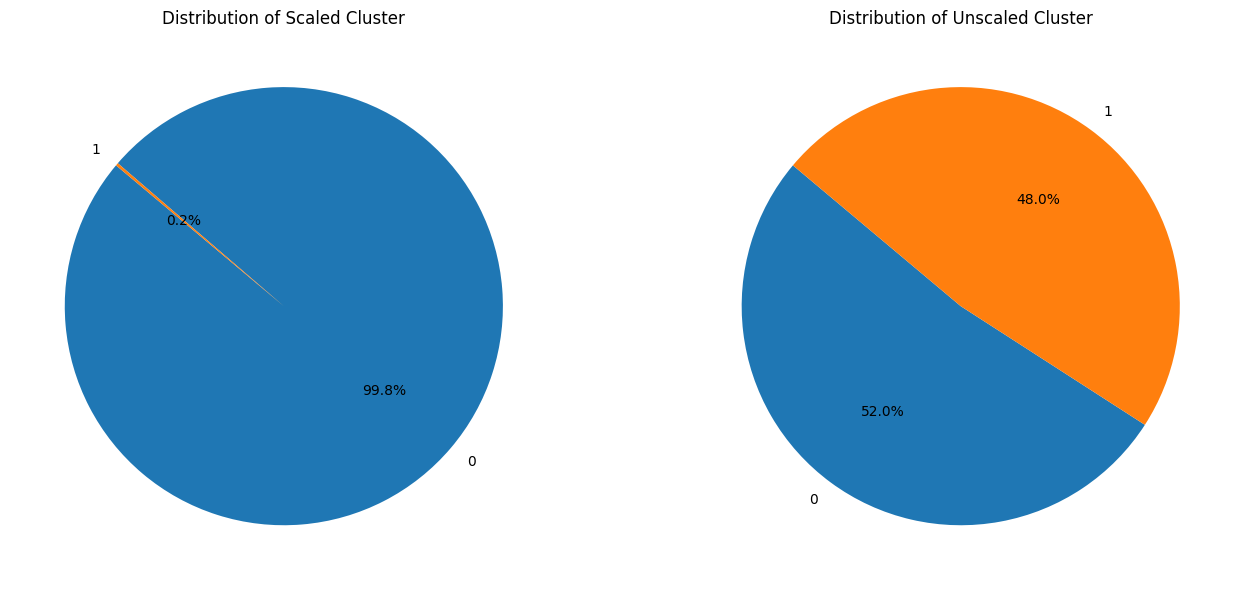

In [151]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_Cluster' column
plt.subplot(1, 2, 1)
y_counts_scaled = df['Scaled_Cluster'].value_counts()
plt.pie(
    y_counts_scaled,
    labels=y_counts_scaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Scaled Cluster')

# Counts of each unique value in the 'Unscaled_Cluster' column
plt.subplot(1, 2, 2)
y_counts_unscaled = df['Unscaled_Cluster'].value_counts()
plt.pie(
    y_counts_unscaled,
    labels=y_counts_unscaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Unscaled Cluster')

plt.tight_layout()
plt.show()

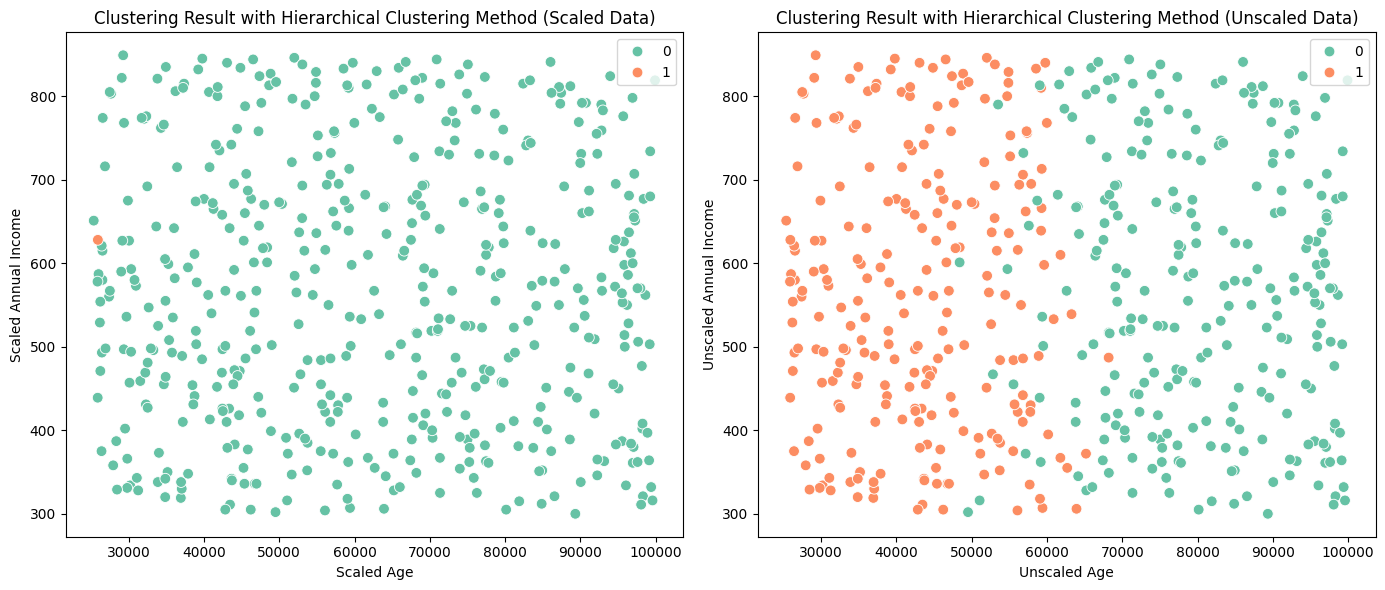

In [152]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_Cluster' column
plt.subplot(1, 2, 1)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="Scaled_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with Hierarchical Clustering Method (Scaled Data)")
plt.legend()

# Counts of each unique value in the 'Unscaled_Cluster' column
plt.subplot(1, 2, 2)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="Unscaled_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Unscaled Age")
plt.ylabel("Unscaled Annual Income")
plt.title("Clustering Result with Hierarchical Clustering Method (Unscaled Data)")
plt.legend()

plt.tight_layout()
plt.show()

In [153]:
import plotly.express as px
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Unscaled_Cluster',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score (Unscaled Data)',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Scaled_Cluster',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score (Scaled Data)',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [157]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Scaled Cluster
silhouette_scaled = silhouette_score(df_scaled, df['Scaled_Cluster'])
print(f"Silhouette Score for Scaled Cluster: {silhouette_scaled:.4f}")

# Calculate Silhouette Score for Unscaled Cluster
silhouette_unscaled = silhouette_score(df.drop(columns=['Scaled_Cluster', 'Unscaled_Cluster']), df['Unscaled_Cluster'])
print(f"Silhouette Score for Unscaled Cluster: {silhouette_unscaled:.4f}")

Silhouette Score for Scaled Cluster: 0.1194
Silhouette Score for Unscaled Cluster: 0.3957


Based on the silhouette scores and visualizations, the **unscaled clustering model clearly delivers superior cluster quality and interpretability compared to the scaled model**. The unscaled model achieves a much higher silhouette score (≈0.396), indicating stronger cohesion within clusters and clearer separation between them, which is also evident in the scatter and 3D visualizations where two well-formed groups emerge. In contrast, the scaled model produces a very low silhouette score (≈0.119) and collapses almost all customers into a single dominant cluster, leaving only one data point isolated—showing that scaling removed meaningful differences in financial behaviors and weakened the cluster structure. The dendrograms and pie charts also reinforce this: unscaled clustering forms two balanced, interpretable segments, while scaled clustering becomes imbalanced and non-informative. Overall, the unscaled model provides far better cluster quality, more coherent segmentation, and significantly stronger interpretability for managerial decision-making.

## Statistical Summary

### Unscaled Data

In [155]:
# Unscaled Data
# Group the data by cluster and calculate mean, median, and mode for each feature
cluster_summary = df.groupby(y_hc).agg({
    'Age': ['first', 'count'],
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Online_Activity': ['mean', 'median'],
    'Education': ['first', 'count'],
    'Customer_Satisfaction': ['first', 'count']
})

# Rename the 'first' column (used as mode) for categorical columns
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename the cluster axis
cluster_summary = cluster_summary.rename_axis('Cluster')

# Display the final summary
cluster_summary.round(2)

Age       Credit_Score        Years_with_Bank         \
        mode count         mean median            mean median   
Cluster                                                         
0         57   260       566.54  567.0           10.58   10.0   
1         36   240       563.32  557.5           11.05   11.0   

        Transaction_Count         Balance           ... Credit_Card_Limit  \
                     mean median     mean   median  ...              mean   
Cluster                                             ...                     
0                   45.57   44.0  5307.33  5461.37  ...          10299.05   
1                   51.65   53.0  4797.95  4706.84  ...          10946.80   

                  Purchase_Frequency        Online_Activity        Education  \
           median               mean median            mean median      mode   
Cluster                                                                        
0         9998.71               0.52   0.53            0.47   0.42         1   
1        11475.67               0.51   0.53            0.52   0.53         1   

              Customer_Satisfaction        
        count                  mode count  
Cluster                                    
0         260                     1   260  
1         240                     4   240  

[2 rows x 22 columns]

### Scaled Data

In [156]:
# Scaled Data
# Group the data by cluster and calculate mean, median, and mode for each feature
cluster_summary = df.groupby(y_hc_scaled).agg({
    'Age': ['first', 'count'],
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Online_Activity': ['mean', 'median'],
    'Education': ['first', 'count'],
    'Customer_Satisfaction': ['first', 'count']
})

# Rename the 'first' column (used as mode) for categorical columns
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename the cluster axis
cluster_summary = cluster_summary.rename_axis('Cluster')

# Display the final summary
cluster_summary.round(2)

Age       Credit_Score        Years_with_Bank         \
        mode count         mean median            mean median   
Cluster                                                         
0         57   499       564.87  562.0           10.83   11.0   
1         20     1       628.00  628.0            1.00    1.0   

        Transaction_Count         Balance           ... Credit_Card_Limit  \
                     mean median     mean   median  ...              mean   
Cluster                                             ...                     
0                    48.4   48.0  5054.24  4935.83  ...          10609.69   
1                    92.0   92.0  9347.07  9347.07  ...          10749.67   

                  Purchase_Frequency        Online_Activity        Education  \
           median               mean median            mean median      mode   
Cluster                                                                        
0        10706.42               0.51   0.53            0.49   0.49         1   
1        10749.67               0.96   0.96            0.34   0.34         0   

              Customer_Satisfaction        
        count                  mode count  
Cluster                                    
0         499                     1   499  
1           1                     1     1  

[2 rows x 22 columns]

## Segmentation & Managerial Implication

**Which Model is Better?**

The results clearly show that the **unscaled clustering model produces far better and clearer cluster separation** compared to the scaled version. The silhouette score for the unscaled model is **0.3957**, which indicates reasonably cohesive and well-separated clusters, while the scaled model achieves only **0.1194**, reflecting weak separation and poor cohesion between data points. This pattern is also visible in the visualizations: in the scaled plots, nearly all data points collapse into a single dominant cluster, making the second cluster almost nonexistent, whereas the unscaled plots reveal two more balanced and well-defined groups.

The reason scaling affects clustering so drastically is because your dataset consists of meaningful numeric ranges—such as income, age, credit score, and balance—whose magnitudes naturally encode customer behavior differences. When StandardScaler is applied, all features are forced onto the same scale, eliminating the natural variance that helps separate customer segments. This suppression of meaningful magnitude differences causes the clustering algorithm to lose important structural signals, resulting in weak and uninformative clusters. Therefore, the **unscaled model is clearly superior**, because it preserves the true financial patterns within the data and produces clusters that are both interpretable and statistically stronger.


### Cluster Interpretation

**Cluster Interpretation for Unscaled Data**

**Cluster 0 (n = 260)**

*“Older, lower-engagement customers with moderate income and low satisfaction.”*

Characteristics:
*   Age: higher (mode = 57)
*   Income & Balance: moderate, slightly above average
*   Usage: lower transaction count, lower online activity
* Credit Limit: lower
*   Tenure: slightly shorter
* Satisfaction: mode = 1 (low)

Interpretation:

This group represents older, less digitally engaged customers who keep money in the bank but use fewer services and express low satisfaction. They may be more traditional users who rely on basic banking but are dissatisfied with current service levels or digital experiences.

---
**Cluster 1 (n = 240)**

*“Younger, highly engaged customers with higher credit limits and strong satisfaction.”*

Characteristics:
*   Age: younger (mode = 36)
*   Income & Balance: comparable, sometimes slightly higher
*   Usage: higher transaction count, higher online activity
*   Credit Limit: higher
*   Tenure: slightly longer
* Satisfaction: mode = 4 (high)

Interpretation:

This cluster consists of younger, digitally active, loyal customers who frequently use banking services and report strong satisfaction. They represent a valuable segment with high engagement, strong adoption of digital channels, and growth potential.

### Managerial Implications

**Managerial Implications for Unscaled Data**

**Cluster 0 (n = 260) — Average Income, Low Activity, Low Satisfaction**

Profile:


* Age around 57 (mode) with mid-range income and account balance.   
* Lower engagement: fewer transactions, slightly lower online activity.   
* Smaller credit card limits.   
* Customer Satisfaction mode = 1 (lowest).   
*  Slightly shorter banking relationship.  

Meaning:

This group represents passive or at-risk customers. They keep money in the bank but are not actively using many services. Their lower satisfaction indicates a potential risk of churn unless the bank improves their experience.

Strategies:
*  Implement service recovery initiatives: re-engagement calls, improved customer service touchpoints.
*   Introduce activation incentives: cashback on first digital transaction, waived fees, bonus transfers.
*   Increase digital banking adoption through simple, step-by-step tutorials and onboarding campaigns.
*   Build a retention program for early-stage customers to prevent churn.

Focus KPIs:
*   Activation rate (first successful digital transaction)
*   Monthly Active Users (MAU)
*   30-day and 90-day retention
*   Reduction in churn rate
---
**Cluster 1 (n = 240) — High Engagement, Higher Credit Limit, Loyal & Satisfied**

Profile:
*   Age around 36 (mode), stable or slightly higher income.
*   Higher transaction counts and more active digital behavior.
*   Higher credit card limits.
*   Customer Satisfaction mode = 4 (highest).
*   Slightly longer tenure with the bank.

Meaning:

This is the bank’s high-value, loyal customer base. They are engaged, satisfied, and already trust the bank—making them highly suitable for upselling and cross-selling premium financial products.

Strategies:
*   Offer premium banking products: high-limit cards, wealth management, personal loans.
*   Create exclusive loyalty and rewards programs (tiered benefits, VIP access, priority support).
*   Use personalized marketing using behavioral analytics to recommend products.
*   Encourage participation in referral programs, leveraging their loyalty to attract similar clients.


Focus KPIs:
*   Customer Lifetime Value (CLV)
*   Cross-sell and upsell rate
*   Annual Revenue Per User (ARPU)
*   Referral conversion rate






